<a href="https://colab.research.google.com/github/miy0ung/diabetes_prediction_project/blob/main/%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1_DAT_%EA%B0%9C%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 당뇨병 예측

## **1. 데이터셋 불러오기**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DAT/당뇨병 예측/diabetes_prediction_dataset.csv')

## **2. EDA & 데이터 전처리**

### 전처리

In [4]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [5]:
#중복된 행 제거
df.duplicated().sum()
df.shape

(100000, 9)

In [6]:
df = df[df['gender'] != 'Other']

In [7]:
df['age'] = df['age'].astype(int)

<ipython-input-7-9b0df8191b9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].astype(int)


In [8]:
gender_dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, gender_dummies], axis=1)
df=df.drop(['gender'], axis=1)
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male
0,80,0,1,never,25.19,6.6,140,0,1,0
1,54,0,0,No Info,27.32,6.6,80,0,1,0
2,28,0,0,never,27.32,5.7,158,0,0,1
3,36,0,0,current,23.45,5.0,155,0,1,0
4,76,1,1,current,20.14,4.8,155,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,No Info,27.32,6.2,90,0,1,0
99996,2,0,0,No Info,17.37,6.5,100,0,1,0
99997,66,0,0,former,27.83,5.7,155,0,0,1
99998,24,0,0,never,35.42,4.0,100,0,1,0


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['smoking_history'] = le.fit_transform(df['smoking_history'])
df

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male
0,80,0,1,4,25.19,6.6,140,0,1,0
1,54,0,0,0,27.32,6.6,80,0,1,0
2,28,0,0,4,27.32,5.7,158,0,0,1
3,36,0,0,1,23.45,5.0,155,0,1,0
4,76,1,1,1,20.14,4.8,155,0,0,1
...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,0,27.32,6.2,90,0,1,0
99996,2,0,0,0,17.37,6.5,100,0,1,0
99997,66,0,0,3,27.83,5.7,155,0,0,1
99998,24,0,0,4,35.42,4.0,100,0,1,0


In [10]:
cols = df.columns.tolist()
cols.remove('diabetes')
df=df[cols+['diabetes']]

In [11]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

## **2단계 : 모델링**

### train_test_split

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 오버샘플링

In [14]:
#오버샘플링
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_train_over, y_train_over=smote.fit_resample(X_train,y_train)
y_train_over.value_counts()

0    73193
1    73193
Name: diabetes, dtype: int64

#### Logistic Regression

In [22]:
from sklearn.metrics import classification_report,f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_over, y_train_over)

lr_y_train_pred = lr.predict(X_train_over)
lr_y_test_pred = lr.predict(X_test)

print(classification_report(y_train_over, lr_y_train_pred))
print(classification_report(y_test, lr_y_test_pred))
print(recall_score(y_train_over, lr_y_train_pred))
print(recall_score(y_test, lr_y_test_pred))
print(f1_score(y_train_over, lr_y_train_pred))
print(f1_score(y_test, lr_y_test_pred))

'''
print("train:", lr.score(X_train_over, y_train_over))
print("test: ", lr.score(X_test, y_test))
'''

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     73193
           1       0.89      0.88      0.88     73193

    accuracy                           0.88    146386
   macro avg       0.88      0.88      0.88    146386
weighted avg       0.88      0.88      0.88    146386

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     18289
           1       0.42      0.89      0.57      1708

    accuracy                           0.89     19997
   macro avg       0.70      0.89      0.75     19997
weighted avg       0.94      0.89      0.90     19997

0.8828303253043324
0.8905152224824356
0.8844435015295752
0.5709459459459459


'\nprint("train:", lr.score(X_train_over, y_train_over))\nprint("test: ", lr.score(X_test, y_test))\n'

In [ ]:
from sklearn.metrics import roc_auc_score

prediction_train = lr.predict(X_train_over)
prediction_test = lr.predict(X_test)

print('roc auc value train : {}'.format(roc_auc_score(y_train_over,prediction_train))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,prediction_test)))

roc auc value train : 0.8846542702170972
roc auc value test: 0.8878733912182533


#### Random Forest


In [21]:
from sklearn.metrics import classification_report,confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_over , y_train_over)

rf_y_train_pred = rf.predict(X_train_over)
rf_y_test_pred = rf.predict(X_test)

print(classification_report(y_train_over, rf_y_train_pred))
print(classification_report(y_test, rf_y_test_pred))
print(recall_score(y_train_over, rf_y_train_pred))
print(recall_score(y_test, rf_y_test_pred))

print(f1_score(y_train_over, rf_y_train_pred))
print(f1_score(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73193
           1       1.00      1.00      1.00     73193

    accuracy                           1.00    146386
   macro avg       1.00      1.00      1.00    146386
weighted avg       1.00      1.00      1.00    146386

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18289
           1       0.79      0.74      0.77      1708

    accuracy                           0.96     19997
   macro avg       0.88      0.86      0.87     19997
weighted avg       0.96      0.96      0.96     19997

0.9993441995819272
0.7447306791569087
0.9995763638351371
0.7669580946638529


In [ ]:
from sklearn.metrics import roc_auc_score

prediction_train = rf.predict(X_train_over)
prediction_test = rf.predict(X_test)

print('roc auc value train : {}'.format(roc_auc_score(y_train_over,prediction_train))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,prediction_test)))

roc auc value train : 0.9995764622299949
roc auc value test: 0.8617978064392374


#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score

svm = SVC()
svm.fit(X_train_over, y_train_over)

svm_y_train_pred = svm.predict(X_train_over)
svm_y_test_pred = svm.predict(X_test)

print(classification_report(y_train_over, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     73193
           1       0.89      0.92      0.91     73193

    accuracy                           0.90    146386
   macro avg       0.90      0.90      0.90    146386
weighted avg       0.90      0.90      0.90    146386

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18289
           1       0.44      0.92      0.59      1708

    accuracy                           0.89     19997
   macro avg       0.72      0.90      0.77     19997
weighted avg       0.94      0.89      0.91     19997



In [ ]:
from sklearn.metrics import roc_auc_score

prediction_train = svm.predict(X_train_over)
prediction_test = svm.predict(X_test)

print('roc auc value train : {}'.format(roc_auc_score(y_train_over,prediction_train))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,prediction_test)))

roc auc value train : 0.9043146202505703
roc auc value test: 0.9047134748968647


### 언더샘플링

In [23]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

max_dia=df[df['diabetes']==1]
min_dia=df[df['diabetes']==0]
undersample=RandomUnderSampler(random_state=42)
X_train_under, y_train_under=undersample.fit_resample(X_train,y_train)
y_train_under.value_counts()

0    6792
1    6792
Name: diabetes, dtype: int64

#### Logistics Regression

In [29]:
from sklearn.metrics import recall_score, precision_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_under, y_train_under)

y_train_pred = lr.predict(X_train_under)
y_test_pred = lr.predict(X_test)

print("recall_train:", recall_score(y_train_under, y_train_pred))
print("recall_test: ", recall_score(y_test, y_test_pred))

print("precision_train:", precision_score(y_train_under, y_train_pred))
print("precision_test: ", precision_score(y_test, y_test_pred))


print(classification_report(y_train_under, y_train_pred))
print(classification_report(y_test, y_test_pred))

print(f1_score(y_train_under, y_train_pred))
print(f1_score(y_test, y_test_pred))

'''
print("train:", lr.score(X_train_over, y_train_over))
print("test: ", lr.score(X_test, y_test))
'''

recall_train: 0.8825088339222615
recall_test:  0.8916861826697893
precision_train: 0.8893175074183977
precision_test:  0.416120218579235
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6792
           1       0.89      0.88      0.89      6792

    accuracy                           0.89     13584
   macro avg       0.89      0.89      0.89     13584
weighted avg       0.89      0.89      0.89     13584

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18289
           1       0.42      0.89      0.57      1708

    accuracy                           0.88     19997
   macro avg       0.70      0.89      0.75     19997
weighted avg       0.94      0.88      0.90     19997

0.8859000886786876
0.5674366616989568


'\nprint("train:", lr.score(X_train_over, y_train_over))\nprint("test: ", lr.score(X_test, y_test))\n'

In [ ]:
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression



# 위 코드 확인 후

# 로지스틱 회귀

lr_model = LogisticRegression()

lr_model.fit(X_train_under,y_train_under)

prediction_train = lr_model.predict(X_train_under)
prediction_test = lr_model.predict(X_test)

print('roc auc value {}'.format(roc_auc_score(y_train_under,prediction_train))) 
print('roc auc value {}'.format(roc_auc_score(y_test,prediction_test))) # 이  value는 auc에 대한 면적을 나타낸 것이다.

# display_eval(y_test,prediction)

roc auc value 0.886336866902238
roc auc value 0.8874199954849301


#### Random Forest

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train_under , y_train_under)

rf_y_train_pred = rf.predict(X_train_under)
rf_y_test_pred = rf.predict(X_test)

print(classification_report(y_train_under, rf_y_train_pred))
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6792
           1       1.00      1.00      1.00      6792

    accuracy                           1.00     13584
   macro avg       1.00      1.00      1.00     13584
weighted avg       1.00      1.00      1.00     13584

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     18289
           1       0.45      0.92      0.61      1708

    accuracy                           0.90     19997
   macro avg       0.72      0.91      0.77     19997
weighted avg       0.95      0.90      0.91     19997



### SVM

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

svm = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

svm.fit(X_train_under, y_train_under)

svm_y_train_pred = svm.predict(X_train_under)
svm_y_test_pred = svm.predict(X_test)

cv_scores = cross_val_score(svm, X_train_under, y_train_under, cv=kfold, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도: ", cv_scores)
print("평균 정확도: ", cv_scores.mean())


print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print(f1_score(y_train_under, svm_y_train_pred))
print(f1_score(y_test, svm_y_test_pred))

"""
print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"""

교차 검증 정확도:  [0.90283401 0.89400074 0.89657711 0.89252852 0.89874816]
평균 정확도:  0.8969377068942995
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6792
           1       0.89      0.91      0.90      6792

    accuracy                           0.90     13584
   macro avg       0.90      0.90      0.90     13584
weighted avg       0.90      0.90      0.90     13584

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18289
           1       0.43      0.91      0.58      1708

    accuracy                           0.89     19997
   macro avg       0.71      0.90      0.76     19997
weighted avg       0.94      0.89      0.91     19997

0.8997733752467286
0.584777694046722


"\nprint(classification_report(y_train_under, svm_y_train_pred))\nprint(classification_report(y_test, svm_y_test_pred))\n\nprint('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) \nprint('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_auc_score

svm = SVC(kernel='linear') 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
svm.fit(X_train_under, y_train_under)

svm_y_train_pred = svm.predict(X_train_under)
svm_y_test_pred = svm.predict(X_test)

cv_scores = cross_val_score(svm, X_train_under, y_train_under, cv=kfold, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도: ", cv_scores)
print("평균 정확도: ", cv_scores.mean())

print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print(f1_score(y_train_under, svm_y_train_pred))
print(f1_score(y_test, svm_y_test_pred))


"""print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"""

교차 검증 정확도:  [0.89289658 0.8895841  0.88479941 0.8778064  0.89064801]
평균 정확도:  0.8871469008473893
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6792
           1       0.89      0.89      0.89      6792

    accuracy                           0.89     13584
   macro avg       0.89      0.89      0.89     13584
weighted avg       0.89      0.89      0.89     13584

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18289
           1       0.41      0.90      0.56      1708

    accuracy                           0.88     19997
   macro avg       0.70      0.89      0.75     19997
weighted avg       0.94      0.88      0.90     19997

0.8874659601089276
0.5646885366752672


"print(classification_report(y_train_under, svm_y_train_pred))\nprint(classification_report(y_test, svm_y_test_pred))\n\nprint('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) \nprint('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_auc_score


svm = SVC(kernel = 'poly') 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
svm.fit(X_train_under, y_train_under)

svm_y_train_pred = svm.predict(X_train_under)
svm_y_test_pred = svm.predict(X_test)

cv_scores = cross_val_score(svm, X_train_under, y_train_under, cv=kfold, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도: ", cv_scores)
print("평균 정확도: ", cv_scores.mean())

print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print(f1_score(y_train_under, svm_y_train_pred))
print(f1_score(y_test, svm_y_test_pred))


"""print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"""

교차 검증 정확도:  [0.89768127 0.89252852 0.89473684 0.88700773 0.89948454]
평균 정확도:  0.894287779502104
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6792
           1       0.91      0.88      0.89      6792

    accuracy                           0.90     13584
   macro avg       0.90      0.90      0.90     13584
weighted avg       0.90      0.90      0.90     13584

              precision    recall  f1-score   support

           0       0.99      0.91      0.95     18289
           1       0.49      0.89      0.63      1708

    accuracy                           0.91     19997
   macro avg       0.74      0.90      0.79     19997
weighted avg       0.95      0.91      0.92     19997

0.8949696379038908
0.6289620882535737


"print(classification_report(y_train_under, svm_y_train_pred))\nprint(classification_report(y_test, svm_y_test_pred))\n\nprint('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) \nprint('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_auc_score


svm = SVC(kernel = 'rbf') 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
svm.fit(X_train_under, y_train_under)

svm_y_train_pred = svm.predict(X_train_under)
svm_y_test_pred = svm.predict(X_test)


cv_scores = cross_val_score(svm, X_train_under, y_train_under, cv=kfold, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도: ", cv_scores)
print("평균 정확도: ", cv_scores.mean())

print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print(f1_score(y_train_under, svm_y_train_pred))
print(f1_score(y_test, svm_y_test_pred))

"""print(classification_report(y_train_under, svm_y_train_pred))
print(classification_report(y_test, svm_y_test_pred))

print('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"""



교차 검증 정확도:  [0.90283401 0.89400074 0.89657711 0.89252852 0.89874816]
평균 정확도:  0.8969377068942995
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      6792
           1       0.89      0.91      0.90      6792

    accuracy                           0.90     13584
   macro avg       0.90      0.90      0.90     13584
weighted avg       0.90      0.90      0.90     13584

              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18289
           1       0.43      0.91      0.58      1708

    accuracy                           0.89     19997
   macro avg       0.71      0.90      0.76     19997
weighted avg       0.94      0.89      0.91     19997

0.8997733752467286
0.584777694046722


"print(classification_report(y_train_under, svm_y_train_pred))\nprint(classification_report(y_test, svm_y_test_pred))\n\nprint('roc auc value train : {}'.format(roc_auc_score(y_train_under,svm_y_train_pred))) \nprint('roc auc value test: {}'.format(roc_auc_score(y_test,svm_y_test_pred)))"

In [ ]:
from sklearn.metrics import roc_auc_score

prediction_train = svm.predict(X_train_under)
prediction_test = svm.predict(X_test)

print('roc auc value train : {}'.format(roc_auc_score(y_train_under,prediction_train))) 
print('roc auc value test: {}'.format(roc_auc_score(y_test,prediction_test)))

roc auc value train : 0.8990724381625442
roc auc value test: 0.8983426133854279


In [ ]:
import math
import matplotlib.pyplot as plt

def showplt(svm_y_train_pred,y_train_under,svm,title):

    plt.scatter(svm_y_train_pred[:,0], svm_y_train_pred[:,1], c=y, s=30, cmap=plt.cm.Paired)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm.decision_function(xy).reshape(XX.shape)

    #margins,decision boundary
    ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])

    #Support Vector
    ax.scatter(svm.support_vectors_[:,0], svm.support_vectors_[:,1], s=60, facecolors='r')
    plt.title(title)
    plt.show()

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Tree = DecisionTreeClassifier(max_depth=100).fit(X_train, y_train)
y_predTree = Tree.predict(X_test)
accTree = accuracy_score(y_test, y_predTree)
accTree

0.9510426563984598

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_predKNN = KNN.predict(X_test)
accKNN = accuracy_score(y_test, y_predKNN)
accKNN

0.9516927539130869

#### SGD

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# loss 매개변수를 'log'로 지정하여 로지스틱 손실 함수를 최소화
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

scores = cross_validate(sc, X_train, y_train, n_jobs=-1)
print(np.mean(scores['test_score']))

0.9263986997562043


In [ ]:
# sc = SGDClassifier(loss='log',random_state=42)
train_score = []
test_score = []
classes = np.unique(y_train)

In [ ]:
for _ in range(0, 300):
  sc.partial_fit(X_train, y_train, classes=classes)
  train_score.append(sc.score(X_train, y_train))
  test_score.append(sc.score(X_test, y_test))


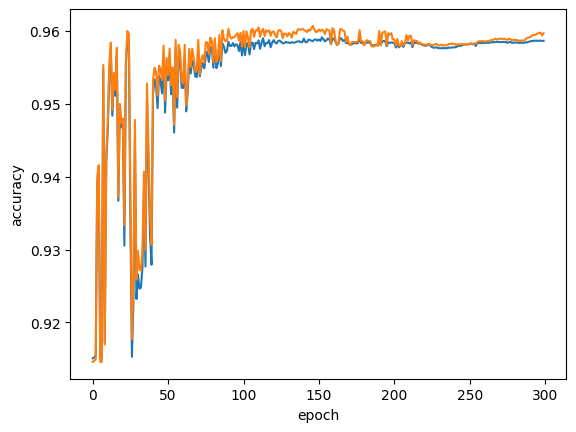

In [ ]:
import matplotlib.pyplot as pit
pit.plot(train_score)
pit.plot(test_score)
plt.xlabel('epoch')
pit.ylabel('accuracy')
plt.show()

In [ ]:
"""sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(X_train, y_train)"""
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))

0.958654747765206
0.959693954093114


In [ ]:
SC = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(X_train, y_train)
print(sc.score(X_train, y_train))
print(sc.score(X_test, y_test))


0.6586860036256799
0.6617492623893584


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


#### 릿지 라쏘

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Ridge
ridge = Ridge().fit(X_train, y_train)

## 객체 생성
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train, y_train)
  train_score.append(ridge.score(X_train, y_train))
  test_score.append(ridge.score(X_test, y_test))

print(train_score)
print(test_score)

[0.3460159581977881, 0.34601595819768793, 0.34601595818767206, 0.3460159571866219, 0.34601585761844267, 0.34600641320093006]
[0.35891457186766196, 0.35891457180828823, 0.35891457120560843, 0.358914564285142, 0.3589144062439663, 0.358904448233926]


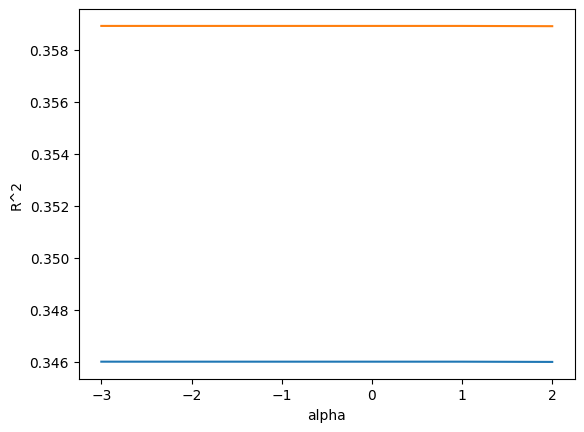

In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# Lasso
lasso = Lasso().fit(X_train, y_train)

## 객체 생성
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter = 1000)
  lasso.fit(X_train, y_train)
  train_score.append(lasso.score(X_train, y_train))
  test_score.append(lasso.score(X_test, y_test))

print(train_score)
print(test_score)


[0.34545469555768105, 0.32904005340396636, 0.22675432038355892, 0.1869050528492353, 0.0, 0.0]
[0.3582361631202221, 0.34163004338791947, 0.24706869707906032, 0.20163873665411347, -3.1606230721514805e-06, -3.1606230721514805e-06]


In [ ]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

SyntaxError: ignored

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
params = {'alpha' : [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] }
gridsearch = GridSearchCV(ridge, param_grid = params)
gridsearch.fit(X_train, y_train)

ridge_estimator = gridsearch.best_estimator_
y_pred = ridge_estimator.predict(X_test)

print(gridsearch.best_params_)
print(ridge_estimator.score(X_test, y_test))